In [1]:
import cv2

In [2]:
# image path
test_image = "0.jfif"

In [3]:
# read Image
test_image = cv2.imread(test_image)

In [4]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

In [6]:
# Extracting the height and width of an image
h, w = test_image.shape[:2]
#  Displaying the height and width
print(h, w)

1250 1000


In [7]:
# Extracting RGB values
# Here we have randomly chosen a pixel
# By passing in 100, 100 for height and width

(R, G, B) = test_image[100, 100]
# Displaying the RGB values
print("R = {}, G = {}, B = {}".format(R, G, B))

R = 51, G = 126, B = 194


In [8]:
# We will calculate the region of interest
# By slicing the pixels of the image
roi = test_image[800:1000, 200:1000]

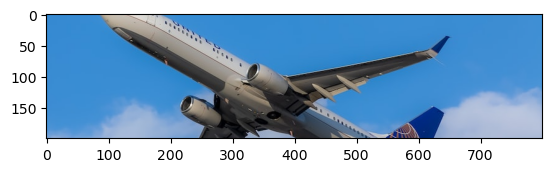

In [9]:
import matplotlib.pyplot as plt
plt.imshow(roi)

In [10]:
test_image_resize = cv2.resize(test_image, (720, 600), interpolation=cv2.INTER_LINEAR)
test_image_resize.shape

(600, 720, 3)

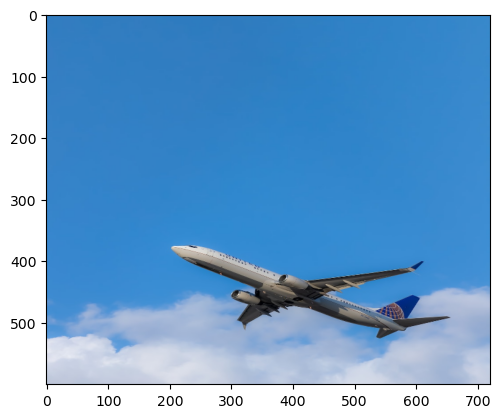

In [11]:
plt.imshow(test_image_resize)

In [12]:
# Calculating the ratio
ratio = 600 / w

# Creating a tuple containing width and height
dim = (600, int(h * ratio))

# Resizing the image
resized_aspect = cv2.resize(test_image_resize, dim)

resized_aspect.shape

(750, 600, 3)

In [13]:
# Calculating the center of the image
center = (w // 2, h // 2)

# Generating a rotation matrix
matrix = cv2.getRotationMatrix2D(center, -45, 1.0)

# Performing the affine transformation
rotated = cv2.warpAffine(resized_aspect, matrix, (w, h))

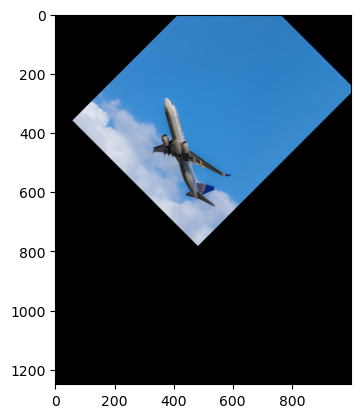

In [14]:
plt.imshow(rotated)

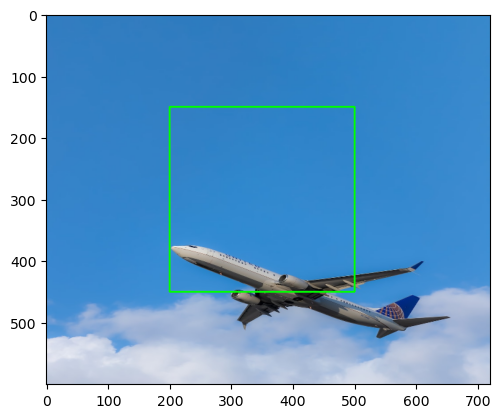

In [18]:
# copying image
test_copy = test_image_resize.copy()

# Using the rectangle() function to create a rectangle.
rectangle_img = cv2.rectangle(test_copy, (200, 150), (500, 450), (0, 255, 0), 2)

plt.imshow(rectangle_img)

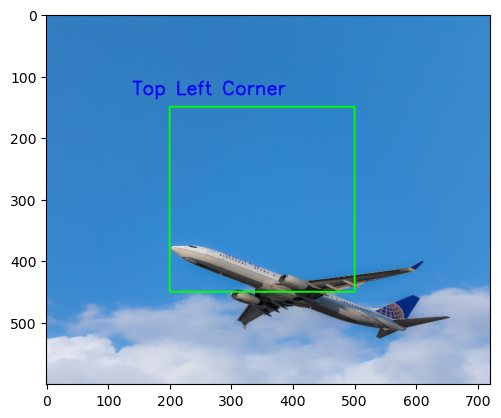

In [19]:
rec_copy = rectangle_img.copy()

# Adding the text using putText() function
text_img = cv2.putText(rec_copy, 'Top Left Corner', (140, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.imshow(text_img)

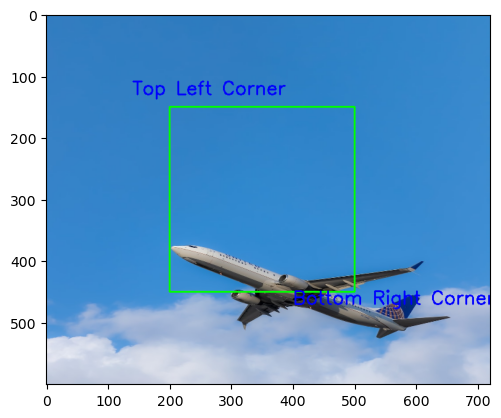

In [22]:
text_copy4 = text_img.copy()

# Adding the text using putText() function
text_image = cv2.putText(text_copy4, 'Bottom Right Corner', (400, 470), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
plt.imshow(text_image)

In [23]:
import numpy as np

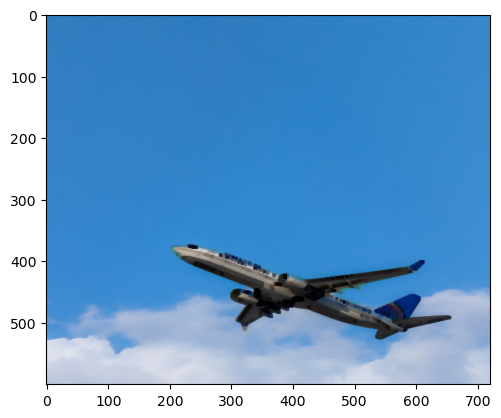

In [24]:
# Eroding
kernel = np.ones((5, 5), np.uint8)

# Using cv2.erode() method
image = cv2.erode(test_image_resize, kernel)

# Displaying the image
plt.imshow(image)

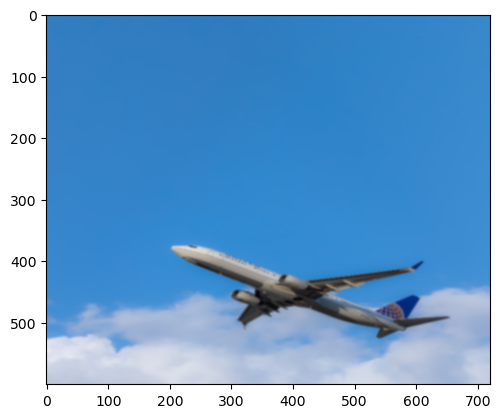

In [25]:
# Gaussian Blur
Gaussian = cv2.GaussianBlur(test_image_resize, (7, 7), 0)
plt.imshow(Gaussian)

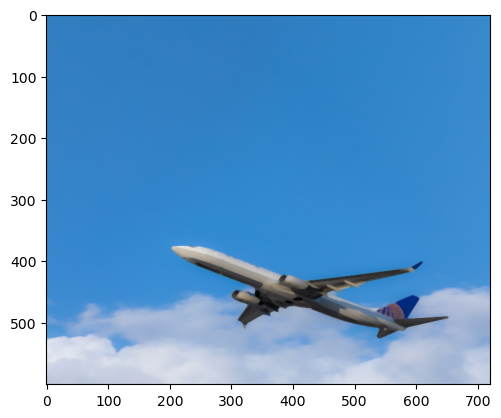

In [26]:
# Median Blur
median = cv2.medianBlur(test_image_resize, 5)
plt.imshow(median)

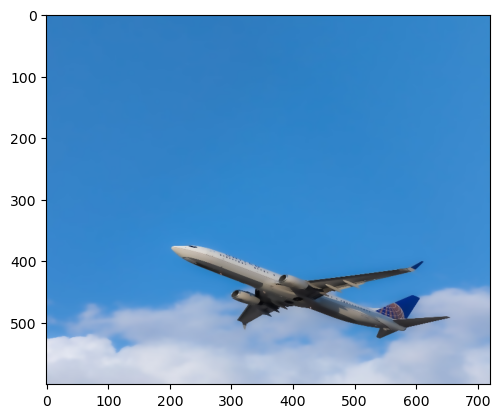

In [27]:
# Bilateral Blur
bilateral = cv2.bilateralFilter(test_image_resize, 9, 75, 75)
plt.imshow(bilateral)

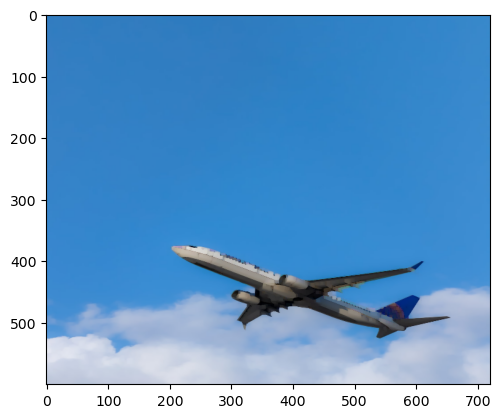

In [29]:
kernel = np.ones((5, 5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(test_image_resize, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
 
plt.imshow(test_image_resize)
plt.imshow(img_erosion)
plt.imshow(img_dilation)

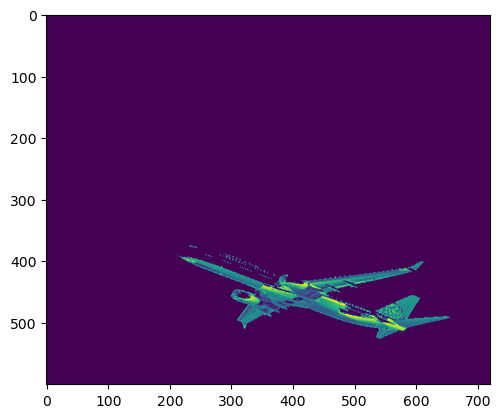

In [30]:
img = cv2.cvtColor(test_image_resize, cv2.COLOR_BGR2GRAY)
 
# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)
 
# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
plt.imshow(thresh1)
plt.imshow(thresh2)
plt.imshow(thresh3)
plt.imshow(thresh4)
plt.imshow(thresh5)